# <font color='Blue'>**Advanced Regression Assignment**</font>

#### A US-based housing company named Surprise Housing has decided to enter the Australian market.

#### The company is looking at prospective properties to buy to enter the market. We are required to build a regression model using regularization, so as to predict the actual value of the prospective properties and decide whether to invest in them or not.

#### The company wants to know:

#### 1.Which variables are significant in predicting the price of a house
#### 2.How well those variables describe the price of a house

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Import Required Packages

In [2]:
#Importing Necessary Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score


In [3]:
pd.set_option('display.max_rows', 80)

In [4]:
pd.set_option('display.max_columns', 80)

In [5]:
# Importing dataset

housing = pd.read_csv('train.csv', encoding = 'latin')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Understanding and Cleaning

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
housing.shape

(1460, 81)

In [8]:
# percentage of missing values in each column
null_values=round(100*(housing.isnull().sum()/len(housing.index)), 2).sort_values(ascending=False)
null_values.loc[null_values>0]

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageCond       5.55
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

#### Lets drop the columns having highest percentage of null values

In [9]:
housing = housing.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'],axis='columns')

In [10]:
# Checking percentage of null values in the remaining columns
null_values=round(100*(housing.isnull().sum()/len(housing.index)), 2).sort_values(ascending=False)
null_values.loc[null_values>0]

GarageType      5.55
GarageYrBlt     5.55
GarageFinish    5.55
GarageCond      5.55
GarageQual      5.55
BsmtExposure    2.60
BsmtFinType2    2.60
BsmtFinType1    2.53
BsmtCond        2.53
BsmtQual        2.53
MasVnrType      0.55
MasVnrArea      0.55
Electrical      0.07
dtype: float64

#### Lets convert the Year columns with the age i.e subtract the year with the max year of the column.

In [11]:
housing['YearBuilt_Old'] = housing.YearBuilt.max()-housing.YearBuilt
housing['YearRemodAdd_Old'] = housing.YearRemodAdd.max()-housing.YearRemodAdd
housing['GarageYrBlt_Old'] = housing.GarageYrBlt.max()-housing.GarageYrBlt
housing['YrSold_Old'] = housing.YrSold.max()-housing.YrSold

housing[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Old','YearRemodAdd_Old',
             'GarageYrBlt_Old','YrSold_Old']].head(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
0,2003,2003,2003.0,2008,7,7,7.0,2
1,1976,1976,1976.0,2007,34,34,34.0,3
2,2001,2002,2001.0,2008,9,8,9.0,2
3,1915,1970,1998.0,2006,95,40,12.0,4
4,2000,2000,2000.0,2008,10,10,10.0,2
5,1993,1995,1993.0,2009,17,15,17.0,1
6,2004,2005,2004.0,2007,6,5,6.0,3
7,1973,1973,1973.0,2009,37,37,37.0,1
8,1931,1950,1931.0,2008,79,60,79.0,2
9,1939,1950,1939.0,2008,71,60,71.0,2


#### Now we can drop the year column

In [12]:
housing = housing.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

In [13]:
#Imputing Missing values
#Imputing GarageYrBlt_Old with -1 as these houses do not have a garage

housing.MasVnrType.fillna('None',inplace=True)
housing.MasVnrArea.fillna(housing.MasVnrArea.mean(),inplace=True)
housing.BsmtQual.fillna('TA',inplace=True)
housing.BsmtCond.fillna('TA',inplace=True)
housing.BsmtExposure.fillna('No',inplace=True)
housing.BsmtFinType1.fillna('Unf',inplace=True)
housing.BsmtFinType2.fillna('Unf',inplace=True)
housing.GarageType.fillna('Attchd',inplace=True)
housing.GarageYrBlt_Old.fillna(-1,inplace=True)
housing.GarageFinish.fillna('Unf',inplace=True)
housing.GarageQual.fillna('TA',inplace=True)
housing.GarageCond.fillna('TA',inplace=True)

In [14]:
housing.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [15]:
housing.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

#### The Street and utilities columns are mostly inclined towards one value. Hence it is not required for the analysis. We can drop these columns

#### Similarly, We don't require a ID column for the analysis. So we can drop the ID column.

In [16]:
housing = housing.drop(['Street','Utilities','Id'],axis='columns')

## Data Analysis

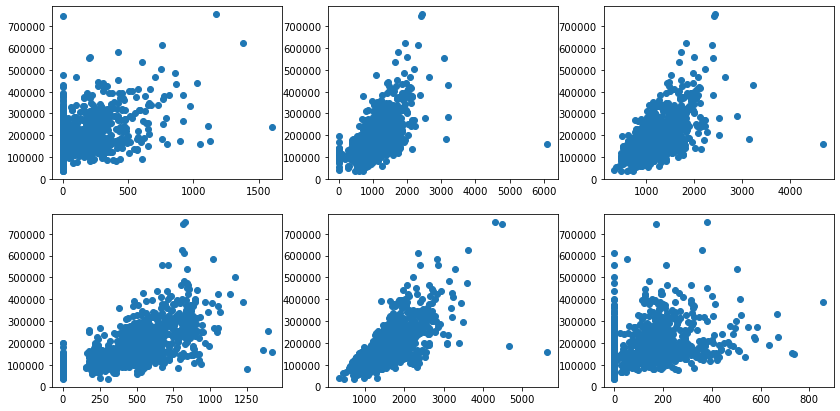

In [17]:
plt.figure(figsize=(14,7)) 
plt.subplot(2,3,1) 
plt.scatter(housing.MasVnrArea,housing.SalePrice)
plt.subplot(2,3,2) 
plt.scatter(housing.TotalBsmtSF,housing.SalePrice) 
plt.subplot(2,3,3) 
plt.scatter(housing['1stFlrSF'],housing.SalePrice) 
plt.subplot(2,3,4) 
plt.scatter(housing['GarageArea'],housing.SalePrice) 
plt.subplot(2,3,5)
plt.scatter(housing['GrLivArea'],housing.SalePrice) 
plt.subplot(2,3,6) 
plt.scatter(housing['WoodDeckSF'],housing.SalePrice)

plt.show()

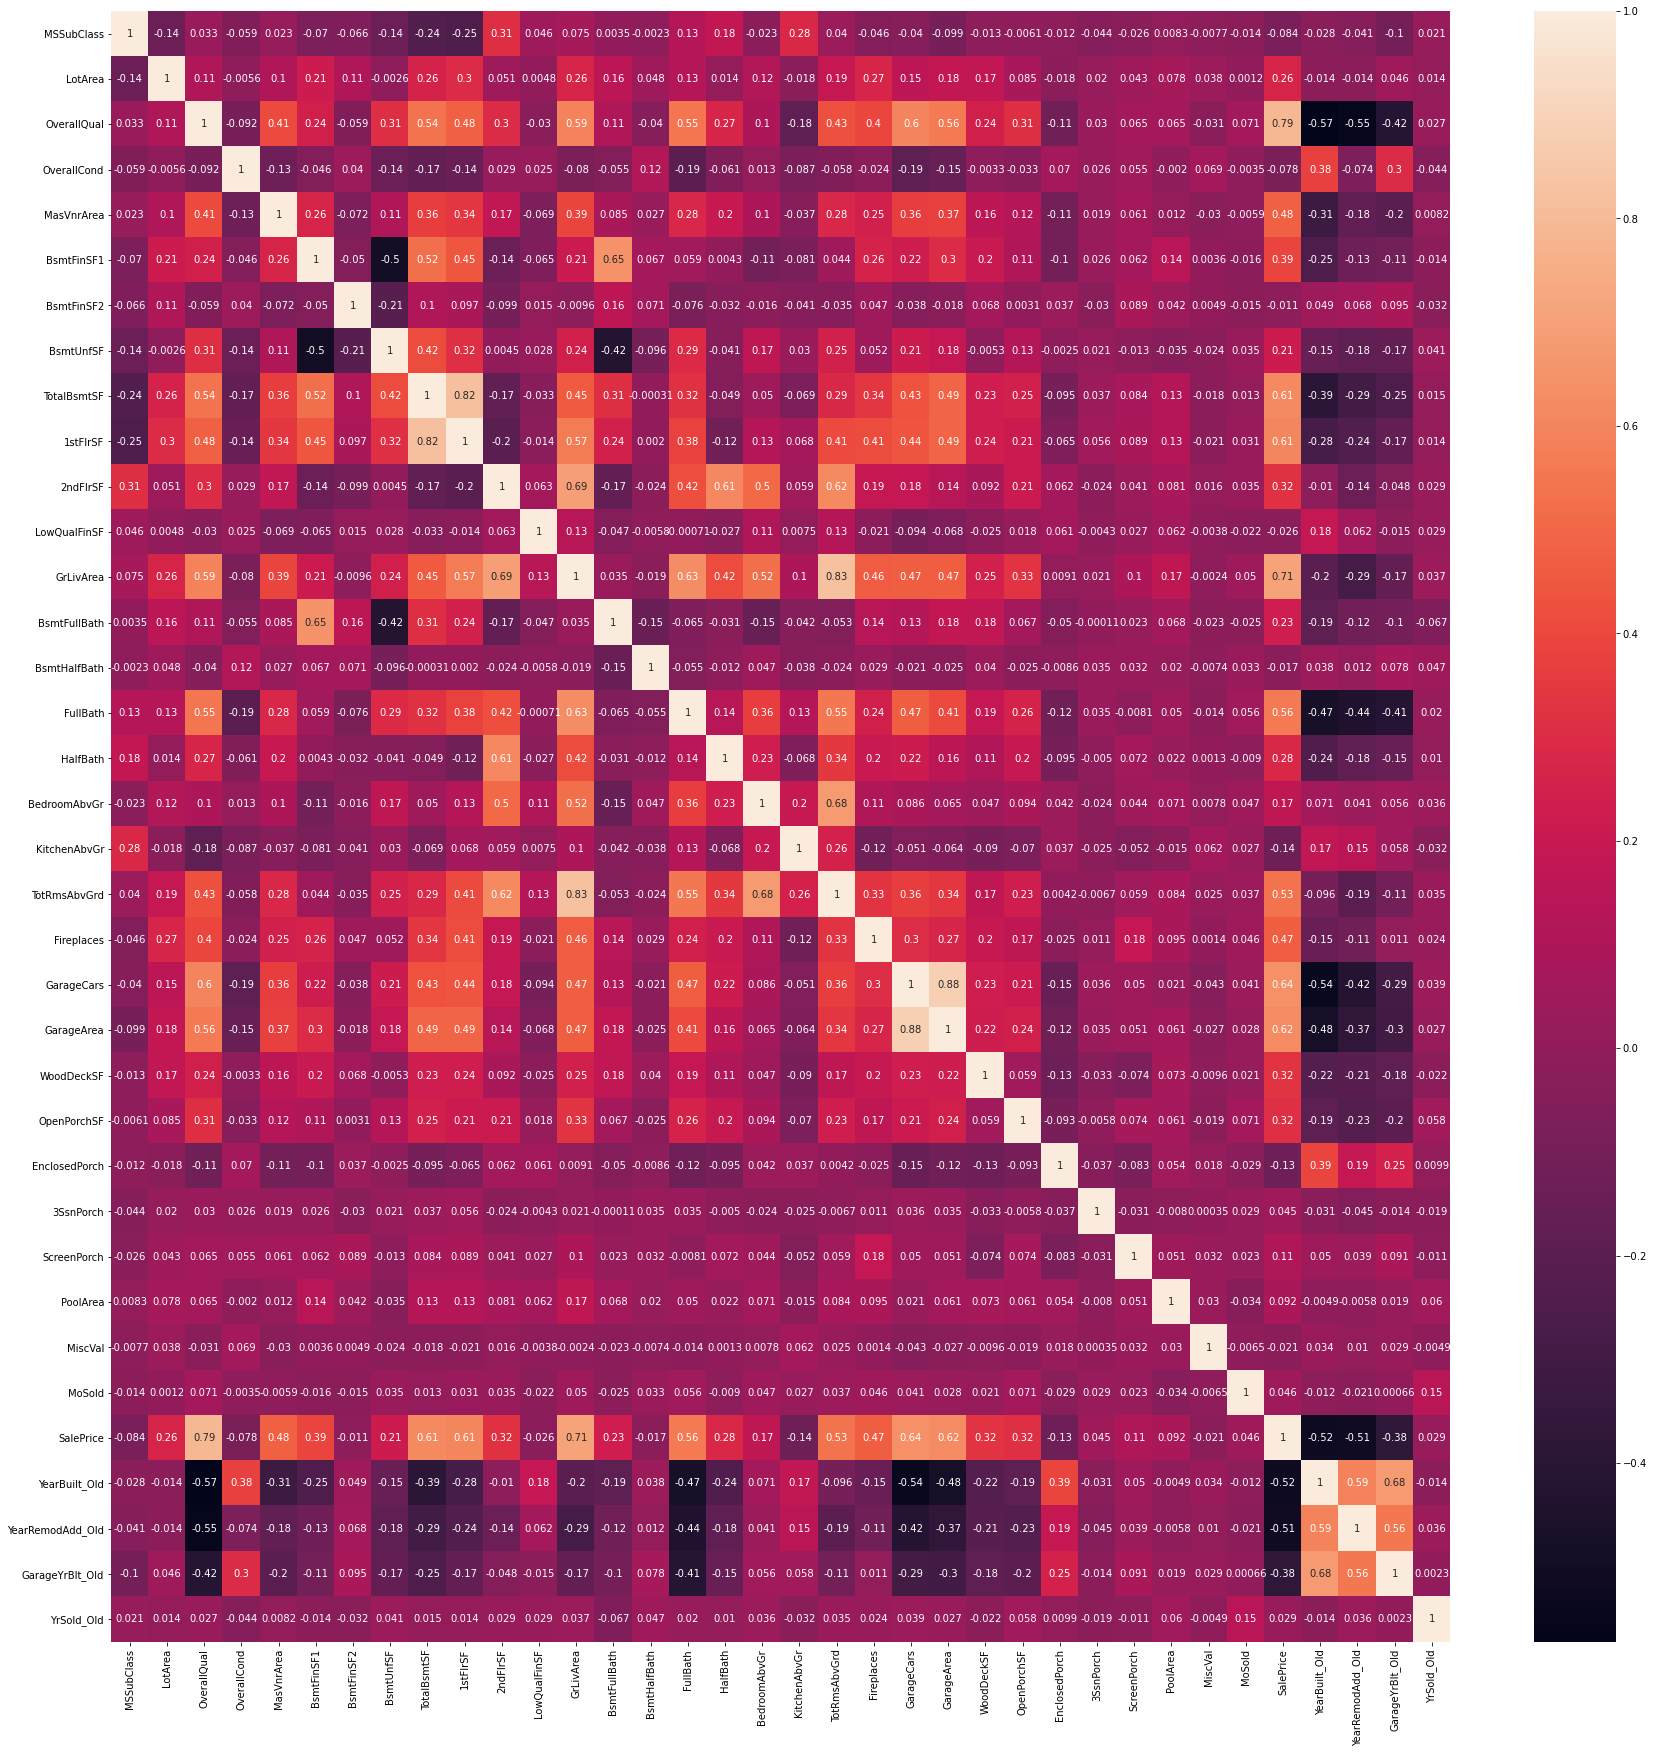

In [18]:
#Check corelation between variables

plt.figure(figsize=(30,30))
sns.heatmap(housing[list(housing.dtypes[housing.dtypes!='object'].index)].corr(),annot=True)
plt.show()

#### Lets handle the outliers.

In [19]:
# Making a list of numerical columns

num_col = list(housing.dtypes[housing.dtypes !='object'].index)
num_col

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SalePrice',
 'YearBuilt_Old',
 'YearRemodAdd_Old',
 'GarageYrBlt_Old',
 'YrSold_Old']

In [20]:
housing[num_col].dtypes

MSSubClass            int64
LotArea               int64
OverallQual           int64
OverallCond           int64
MasVnrArea          float64
BsmtFinSF1            int64
BsmtFinSF2            int64
BsmtUnfSF             int64
TotalBsmtSF           int64
1stFlrSF              int64
2ndFlrSF              int64
LowQualFinSF          int64
GrLivArea             int64
BsmtFullBath          int64
BsmtHalfBath          int64
FullBath              int64
HalfBath              int64
BedroomAbvGr          int64
KitchenAbvGr          int64
TotRmsAbvGrd          int64
Fireplaces            int64
GarageCars            int64
GarageArea            int64
WoodDeckSF            int64
OpenPorchSF           int64
EnclosedPorch         int64
3SsnPorch             int64
ScreenPorch           int64
PoolArea              int64
MiscVal               int64
MoSold                int64
SalePrice             int64
YearBuilt_Old         int64
YearRemodAdd_Old      int64
GarageYrBlt_Old     float64
YrSold_Old          

In [21]:
#Writing a function to drop the outliers
def drop_outliers(val):
    for col in num_col:
        Q1 = val[col].quantile(.25)
        Q3 = val[col].quantile(.99)
        IQR = Q3-Q1
        val =  val[(val[col] >= (Q1-(1.5*IQR))) & (val[col] <= (Q3+(1.5*IQR)))] 
    return val 


In [22]:
housing=drop_outliers(housing)

In [23]:
housing.shape

(1440, 72)

In [24]:
# Making a list of Object columns

obj_col = list(housing.dtypes[housing.dtypes=='object'].index)
obj_col

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [25]:
housing[obj_col].head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


##### Clearly, from above analysis, we can see the below columns seem to be ordinal in nature

In [26]:
housing[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,Gtl,Gd,Gd,TA,No,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,Reg
1,Gtl,TA,Gd,TA,Gd,ALQ,Unf,Ex,Y,TA,RFn,TA,TA,TA,Reg
2,Gtl,Gd,Gd,TA,Mn,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1
3,Gtl,TA,TA,Gd,No,ALQ,Unf,Gd,Y,Gd,Unf,TA,TA,TA,IR1
4,Gtl,Gd,Gd,TA,Av,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1


In [27]:
housing['LandSlope'] = housing.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2}) 
housing['ExterQual'] = housing.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4}) 
housing['BsmtQual'] = housing.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}) 
housing['BsmtCond'] = housing.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}) 
housing['BsmtExposure'] = housing.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4}) 
housing['BsmtFinType1'] = housing.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6}) 
housing['BsmtFinType2'] = housing.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6}) 
housing['HeatingQC'] = housing.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4}) 
housing['CentralAir'] = housing.CentralAir.map({'N':0,'Y':1}) 
housing['KitchenQual'] = housing.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4}) 
housing['GarageFinish'] = housing.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3}) 
housing['GarageQual'] = housing.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}) 
housing['GarageCond'] = housing.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}) 
housing['ExterCond'] = housing.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4}) 
housing['LotShape'] = housing.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [28]:
# Checking the converted columns
housing[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()


,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


In [29]:
#Creating and joining dummy columns

dummy_cols = pd.get_dummies(housing[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']],
                           drop_first=True)

housing = pd.concat([housing,dummy_cols],axis='columns')

housing = housing.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'],axis='columns')

##### Checking the distribution of the Sale Price Column(Target Variable) before scaling and splitting

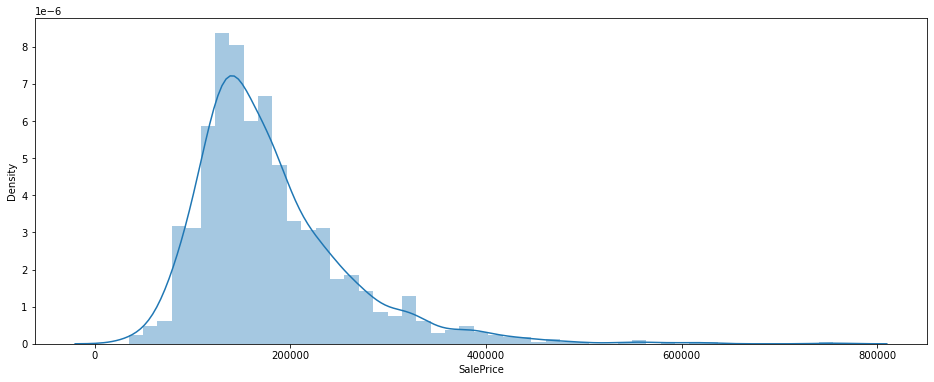

In [30]:
plt.figure(figsize=(16,6))
sns.distplot(housing.SalePrice)
plt.show()

#### Creating the Train and Test dataset for validation

In [31]:
df_train,df_test = train_test_split(housing,train_size=0.7,test_size=0.3,random_state=42)

In [32]:
housing[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


#### Scaling Train dataset

In [33]:
num_cols = ['MSSubClass','LotArea','OverallQual','OverallCond',
           'MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
           'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal','SalePrice']
scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

##### Comparing the Train and Test distribution of the Target variable after scaling

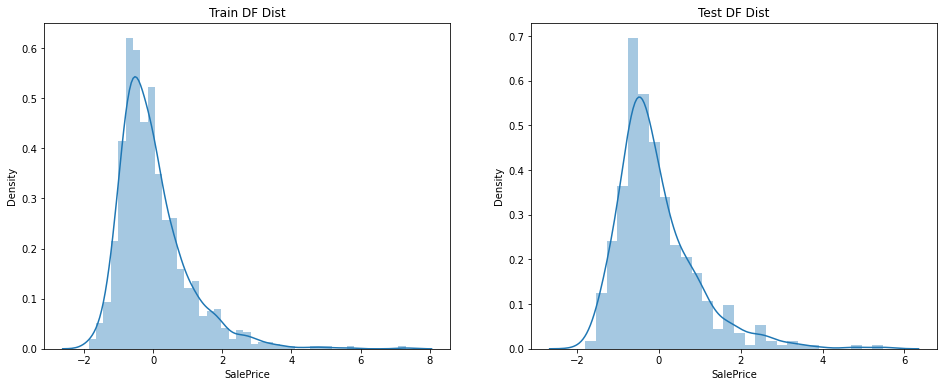

In [34]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.title("Train DF Dist")
sns.distplot(df_train.SalePrice)

plt.subplot(122)
plt.title("Test DF Dist")
sns.distplot(df_test.SalePrice)

plt.show()

In [35]:
# Splitting dependent and independent variables
y_train = df_train.pop('SalePrice')
X_train = df_train


y_test = df_test.pop('SalePrice')
X_test = df_test

##### Lets use RFE to find the number of optimal features

In [36]:
len(X_train.columns)

193

In [38]:
lm=LinearRegression()
lm.fit(X_train,y_train)

rfe=RFE(lm,70)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=70)

In [45]:
rfe_df=pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))

rfe_df.columns=['Col_Name','Status','Rank']

In [47]:
rfe_sel_cols = list(rfe_df[rfe_df.Status==True].Col_Name)

In [49]:
len(rfe_sel_cols)

70

##### Filtering train and test dataset for the RFE selected columns

In [51]:
X_train = X_train[rfe_sel_cols]
X_test = X_test[rfe_sel_cols]

## Lasso Regression-Trial

In [52]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8997469428438885
0.8330257189518142


In [53]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = df_train.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))

[('MSSubClass', -1.569),
 ('LotArea', 0.136),
 ('LotShape', 0.212),
 ('LandSlope', 0.095),
 ('OverallQual', 0.213),
 ('OverallCond', 0.165),
 ('MasVnrArea', 0.144),
 ('ExterQual', 0.046),
 ('ExterCond', -0.0),
 ('BsmtQual', 0.045),
 ('BsmtCond', 0.0),
 ('BsmtExposure', 0.024),
 ('BsmtFinType1', -0.009),
 ('BsmtFinSF1', 0.322),
 ('BsmtFinType2', 0.104),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.048),
 ('TotalBsmtSF', 0.0),
 ('HeatingQC', 0.046),
 ('CentralAir', -0.0),
 ('1stFlrSF', -0.053),
 ('2ndFlrSF', -0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.095),
 ('BsmtFullBath', 0.37),
 ('BsmtHalfBath', 0.358),
 ('FullBath', 0.349),
 ('HalfBath', 0.278),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -3.821),
 ('KitchenQual', -0.177),
 ('TotRmsAbvGrd', -0.169),
 ('Fireplaces', 0.0),
 ('GarageFinish', 0.069),
 ('GarageCars', 0.0),
 ('GarageArea', -0.123),
 ('GarageQual', -0.034),
 ('GarageCond', 0.023),
 ('WoodDeckSF', -0.0),
 ('OpenPorchSF', -0.114),
 ('EnclosedPorch', 1.063),
 ('3SsnPorch', 0.0),


#### Using GridSearchCV to improve model with the optimal value of alpha

In [54]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    2.3s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [55]:
cv_res_l = pd.DataFrame(model_cv.cv_results_)
cv_res_l['param_alpha'] = cv_res_l['param_alpha'].astype('float32')
cv_res_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.055778,0.011843,0.008451,0.005441,0.001,{'alpha': 0.001},0.904383,0.505664,0.878289,0.888444,0.873109,0.880778,0.865932,0.871136,0.931045,0.861726,0.846051,0.115124,1,0.899724,0.900353,0.900514,0.900559,0.901211,0.901515,0.902593,0.902560,0.895722,0.903244,0.900800,0.002006
1,0.017211,0.002968,0.007409,0.001459,0.010,{'alpha': 0.01},0.885984,0.435296,0.821649,0.885562,0.829179,0.843930,0.857398,0.891580,0.903828,0.826466,0.818087,0.130715,2,0.845568,0.872659,0.847879,0.842755,0.846863,0.844449,0.845143,0.841563,0.839714,0.847894,0.847449,0.008779
2,0.011140,0.003094,0.007086,0.002042,0.100,{'alpha': 0.1},0.850629,0.550850,0.795128,0.849606,0.750299,0.764968,0.802980,0.835594,0.843110,0.767125,0.781029,0.084520,3,0.798170,0.822954,0.798983,0.793332,0.793233,0.795855,0.795232,0.792352,0.787953,0.800177,0.797824,0.009043
3,0.011525,0.003107,0.008041,0.002203,1.000,{'alpha': 1.0},-0.060582,-0.001954,-0.000477,-0.011247,-0.008620,-0.000107,-0.000033,-0.000383,-0.001818,-0.010758,-0.009598,0.017530,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.011552,0.002648,0.006864,0.003260,5.000,{'alpha': 5.0},-0.060582,-0.001954,-0.000477,-0.011247,-0.008620,-0.000107,-0.000033,-0.000383,-0.001818,-0.010758,-0.009598,0.017530,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


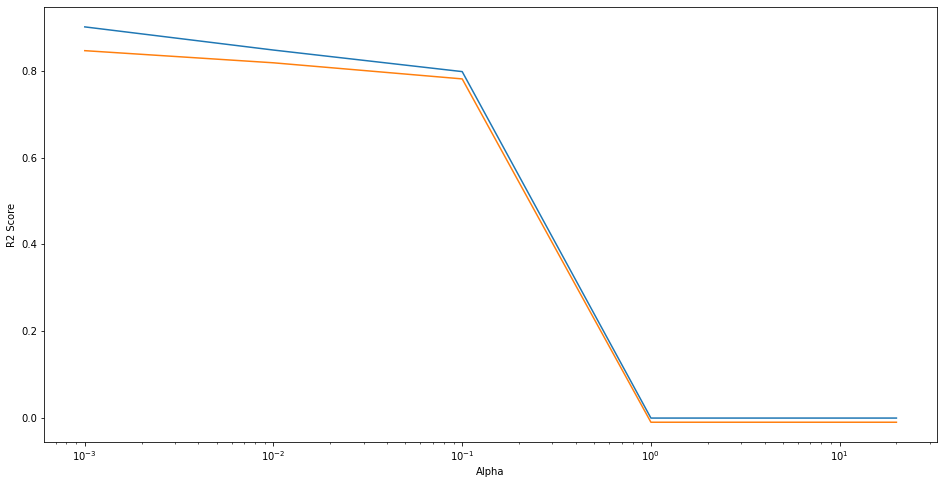

In [56]:
# Comparing R2 and alpha of Train and test dataset

plt.figure(figsize=(16,8))
plt.plot(cv_res_l['param_alpha'],cv_res_l['mean_train_score'])
plt.plot(cv_res_l['param_alpha'],cv_res_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [57]:
#Retreiving the best value for alpha(Best Parameter value)
model_cv.best_params_

{'alpha': 0.001}

In [58]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8997469428438885
0.8330257189518142


In [61]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coeff = pd.DataFrame(list(zip(cols,model_param)))
lasso_coeff.columns = ['Feature','Coeff']

In [62]:
lasso_coeff.sort_values(by='Coeff',ascending=False).head(10)

,Feature,Coeff
40,EnclosedPorch,1.063426
24,BsmtFullBath,0.370194
68,Neighborhood_Gilbert,0.362303
25,BsmtHalfBath,0.357937
26,FullBath,0.348744
13,BsmtFinSF1,0.321917
27,HalfBath,0.277589
4,OverallQual,0.212511
2,LotShape,0.211938
5,OverallCond,0.164592


## Ridge Regression-Trial

#### Using above retrieved alpha value for Ridge Regression

In [63]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.9076375131227234
0.803159125176172


#### From the above R2 value, it is evident that the retrieved alpha value is not optimal for Ridge regression. There is a sign of Overfitting, as there is a hige difference the R2 scores for the train and test dataset

#### Using GridSearchCV to improve model with the optimal value of alpha

In [64]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.4s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [65]:
cv_res_r = pd.DataFrame(model_cv.cv_results_)
cv_res_r['param_alpha'] = cv_res_r['param_alpha'].astype('float32')
cv_res_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.010483,0.002822,0.006517,0.002922,0.001,{'alpha': 0.001},0.892060,0.510243,0.887496,0.887086,0.878465,0.878396,0.865770,0.856630,0.933543,0.871248,0.846094,0.113654,7,0.907644,0.906188,0.908070,0.908074,0.910357,0.909860,0.910224,0.910742,0.903703,0.910915,0.908578,0.002203
1,0.010206,0.003897,0.005414,0.002916,0.010,{'alpha': 0.01},0.892493,0.510772,0.887564,0.887050,0.878425,0.878594,0.865740,0.856997,0.933562,0.871145,0.846234,0.113523,6,0.907640,0.906187,0.908066,0.908071,0.910353,0.909856,0.910220,0.910738,0.903699,0.910911,0.908574,0.002203
2,0.010088,0.002631,0.006587,0.001763,0.100,{'alpha': 0.1},0.895915,0.514019,0.888034,0.886696,0.877966,0.880125,0.865427,0.860394,0.933662,0.870179,0.847242,0.112761,5,0.907330,0.906116,0.907761,0.907776,0.910026,0.909529,0.909927,0.910424,0.903397,0.910617,0.908290,0.002176
3,0.009322,0.002989,0.006684,0.004225,0.200,{'alpha': 0.2},0.898452,0.515343,0.888227,0.886342,0.877378,0.881186,0.865096,0.863673,0.933661,0.869232,0.847859,0.112510,4,0.906628,0.905973,0.907054,0.907099,0.909277,0.908787,0.909254,0.909696,0.902701,0.909939,0.907641,0.002120
4,0.011222,0.002476,0.006151,0.002662,0.500,{'alpha': 0.5},0.902590,0.515098,0.887697,0.885571,0.875491,0.882581,0.864341,0.871408,0.933406,0.866996,0.848518,0.112787,2,0.903836,0.905454,0.904185,0.904375,0.906272,0.905835,0.906539,0.906722,0.899888,0.907200,0.905031,0.002030


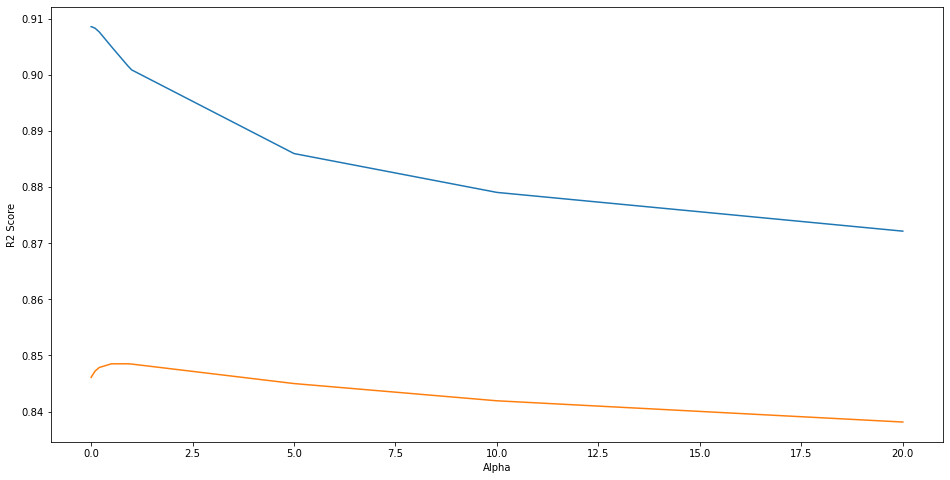

In [66]:
# Comparing R2 and alpha of Train and test dataset

plt.figure(figsize=(16,8))
plt.plot(cv_res_r['param_alpha'],cv_res_r['mean_train_score'])
plt.plot(cv_res_r['param_alpha'],cv_res_r['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.show()

In [67]:
#Retreiving the best value for alpha(Best Parameter value)
model_cv.best_params_

{'alpha': 0.9}

In [68]:
#Creating the Model

ridge = Ridge(alpha = 0.9)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9008849688033851
0.8438656076495333


In [69]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coeff = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coeff.columns = ['Feature','Coeff']

In [70]:
ridge_coeff.sort_values(by='Coeff',ascending=False).head(10)

,Feature,Coeff
40,EnclosedPorch,1.126423
25,BsmtHalfBath,0.425509
26,FullBath,0.417882
24,BsmtFullBath,0.395788
27,HalfBath,0.377618
60,LotConfig_Inside,0.316211
68,Neighborhood_Gilbert,0.299356
61,Neighborhood_Blueste,0.297134
28,BedroomAbvGr,0.286079
59,LotConfig_FR3,0.248957


#### On comparing the models created using Lasso and Ridge Regression, We can conclude that the R2 scores are almost the same for both.

#### We can consider Lasso regression as the final model as it can help in better feature elimination.

### Final Model-Using Lasso Regression

#### Note:- Alpha value(Best parameter value)=0.001

In [71]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8997469428438885
0.8330257189518142


In [72]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coeff = pd.DataFrame(list(zip(cols,model_param)))
lasso_coeff.columns = ['Feature','Coeff']

In [73]:
lasso_coeff.sort_values(by='Coeff',ascending=False).head(10)

,Feature,Coeff
40,EnclosedPorch,1.063426
24,BsmtFullBath,0.370194
68,Neighborhood_Gilbert,0.362303
25,BsmtHalfBath,0.357937
26,FullBath,0.348744
13,BsmtFinSF1,0.321917
27,HalfBath,0.277589
4,OverallQual,0.212511
2,LotShape,0.211938
5,OverallCond,0.164592


# Conclusion
#### As per our analysis, We have tried to build the model using both Lasso and Ridge Regression. The R2 score for both the models is almost the same. Since Ridge Regression model is complex as compared to the Lasso model, we have chosen to build our model using the Lasso Regressin method. Also note that Lasso Regression helps in Feature elimination.

#### Optimal Value for Alpha-Lasso Regression:0.001
#### Optimal Value for Alpha-Ridge Regression:0.9

#### <font color='RED'>**The top 10 features affecting the House Sale Prices (On the basis of the Lasso Model) are as follow:**</font>
#### <font color='RED'>**1. EnclosedPorch**</font>
#### <font color='RED'>**2. BsmtFullBath**</font>
#### <font color='RED'>**3. Neighborhood_Gilbert**</font>
#### <font color='RED'>**4. BsmtHalfBath**</font>
#### <font color='RED'>**5. FullBath**</font>
#### <font color='RED'>**6. BsmtFinSF1**</font>
#### <font color='RED'>**7. HalfBath**</font>
#### <font color='RED'>**8. OverallQual**</font>
#### <font color='RED'>**9. LotShape**</font>
#### <font color='RED'>**10. OverallCond**</font>

### <font color='Blue'>**---------------------------------------------------------------END---------------------------------------------------------------**</font>